# PyTorch로 시작하는 딥러닝 입문
https://wikidocs.net/book/2788
## 01. 로지스틱 회귀
파이토치로 로지스틱 회귀 구현하기  
여기서 사용하는 가설은 H(x) = Wx + b 가 아니라  
S자 모양의 그래프를 만들 수 있는 특정함수 f를 추가한 가설 사용  
여기서 **f는 시그모이드 함수임  
H(x) = f(Wx + b)**  

### 1. 시그모이드 함수

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 시그모이드 함수 정의
def sigmoid(x):
    return 1/(1+np.exp(-x))

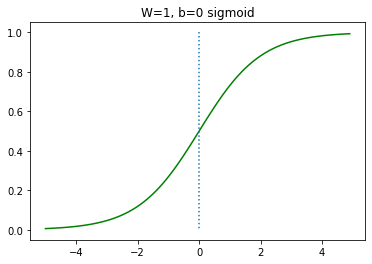

In [3]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('W=1, b=0 sigmoid')
plt.show()

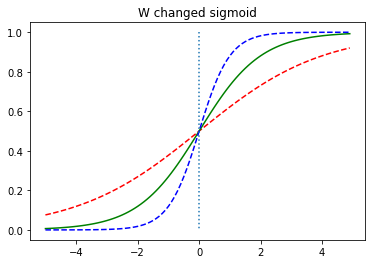

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('W changed sigmoid')
plt.show()

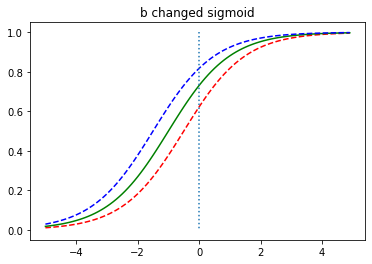

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('b changed sigmoid')
plt.show()

### 2. 로지스틱 회귀 구현하기

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [7]:
torch.manual_seed(1)

In [8]:
# 데이터 생성
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [9]:
# W, b 설정
W = torch.zeros((2, 1), requires_grad=True) # 크기는 2 x 1
b = torch.zeros(1, requires_grad=True)

In [12]:
# 가설 설정 = 시그모이드 함수
# hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))
hypothesis = torch.sigmoid(x_train.matmul(W)+b)
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)


In [13]:
# 오차 계산
losses = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis))
print('losses', losses)

# 전체 오차의 평균(=비용함수 수동계산)
cost = losses.mean()
print('cost', cost)

losses tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)
cost tensor(0.6931, grad_fn=<MeanBackward0>)


In [14]:
# 비용함수 자동계산 F.binary_cross_entropy(예측값, 실제값)
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

In [15]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [16]:
# 평가
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)


In [17]:
# 분류
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [18]:
# 훈련 후 W, b 값
print('W: ', W)
print('b: ', b)

W:  tensor([[3.2530],
        [1.5179]], requires_grad=True)
b:  tensor([-14.4819], requires_grad=True)


## 02. nn.Module로 구현하는 로지스틱 회귀

In [23]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# torch.manual_seed(1)

In [29]:
# 데이터 생성
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [30]:
model = nn.Sequential(nn.Linear(2, 1),
                      nn.Sigmoid())

In [31]:
optimizer = optim.SGD(model.parameters(), lr=1)

In [32]:
n_epochs = 1000

for epoch in range(n_epochs + 1):
    
    # H(x) 계산
    H = model(x_train)
    
    # cost
    cost = F.binary_cross_entropy(H, y_train)
    
    # update
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch%100 == 0:
        prediction = H >= torch.FloatTensor([0.5])  # 예측값이 0.5를 넘으면 True
        correct_prediction = prediction.float() == y_train  # 예측성공
        accuracy = correct_prediction.sum().item() / len(correct_prediction)  # 정확도 계산
        print(f'Epoch {epoch}/{n_epochs}\tCost {cost.item():.4f}\tAccuracy {accuracy*100:2.2f}%')

Epoch 0/1000	Cost 0.5397	Accuracy 83.33%
Epoch 100/1000	Cost 0.1343	Accuracy 100.00%
Epoch 200/1000	Cost 0.0805	Accuracy 100.00%
Epoch 300/1000	Cost 0.0578	Accuracy 100.00%
Epoch 400/1000	Cost 0.0453	Accuracy 100.00%
Epoch 500/1000	Cost 0.0372	Accuracy 100.00%
Epoch 600/1000	Cost 0.0316	Accuracy 100.00%
Epoch 700/1000	Cost 0.0275	Accuracy 100.00%
Epoch 800/1000	Cost 0.0244	Accuracy 100.00%
Epoch 900/1000	Cost 0.0219	Accuracy 100.00%
Epoch 1000/1000	Cost 0.0198	Accuracy 100.00%


## 03. 클래스로 파이토치 모델 구현하기

In [33]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# torch.manual_seed(1)

In [34]:
# 데이터 생성
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [35]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [36]:
model = BinaryClassifier()
optimizer = optim.SGD(model.parameters(), lr=1)

In [37]:
n_epochs = 1000

for epoch in range(n_epochs + 1):
    
    # H(x) 계산
    H = model(x_train)
    
    # cost
    cost = F.binary_cross_entropy(H, y_train)
    
    # update
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch%100 == 0:
        prediction = H >= torch.FloatTensor([0.5])  # 예측값이 0.5를 넘으면 True
        correct_prediction = prediction.float() == y_train  # 예측성공
        accuracy = correct_prediction.sum().item() / len(correct_prediction)  # 정확도 계산
        print(f'Epoch {epoch}/{n_epochs}\tCost {cost.item():.4f}\tAccuracy {accuracy*100:2.2f}%')

Epoch 0/1000	Cost 0.6150	Accuracy 66.67%
Epoch 100/1000	Cost 0.1403	Accuracy 100.00%
Epoch 200/1000	Cost 0.0825	Accuracy 100.00%
Epoch 300/1000	Cost 0.0589	Accuracy 100.00%
Epoch 400/1000	Cost 0.0459	Accuracy 100.00%
Epoch 500/1000	Cost 0.0376	Accuracy 100.00%
Epoch 600/1000	Cost 0.0320	Accuracy 100.00%
Epoch 700/1000	Cost 0.0278	Accuracy 100.00%
Epoch 800/1000	Cost 0.0246	Accuracy 100.00%
Epoch 900/1000	Cost 0.0220	Accuracy 100.00%
Epoch 1000/1000	Cost 0.0200	Accuracy 100.00%
